In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50

In [3]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    
    )

Found 2152 files belonging to 3 classes.


In [7]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[2 0 0 0 2 1 0 0 0 1 1 0 1 0 0 1 1 0 1 2 1 1 2 1 2 0 0 1 0 0 0 0]


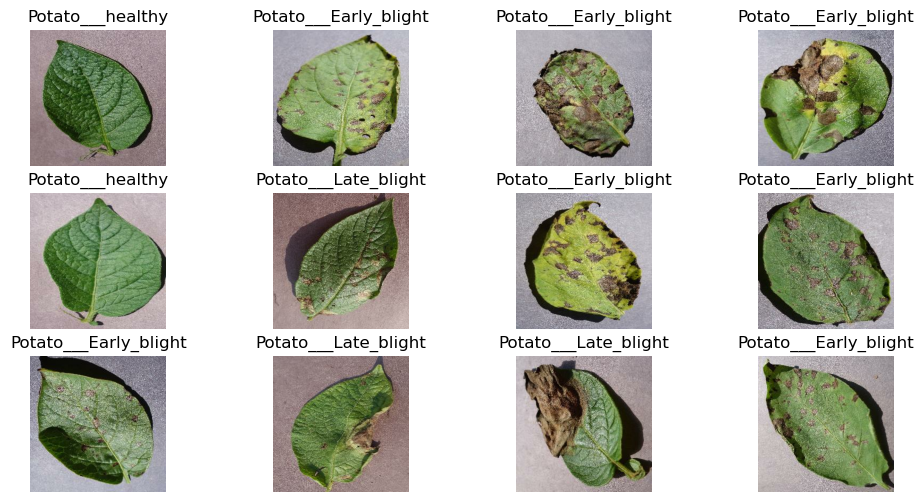

In [20]:
plt.figure(figsize=(12,6))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[labels_batch[i]])
        plt.axis('off')

- Training Data==>80%
- Testing Data==>10%
- Validation Data==>10%

In [31]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [33]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [39]:
print("Length of traing_ds is:{}\nLength of testing_ds is:{}\nLength of validation_ds is:{}\n ".format(len(train_ds),len(test_ds),len(val_ds)))

Length of traing_ds is:54
Length of testing_ds is:8
Length of validation_ds is:6
 


# Cache, Shuffle, and Prefetch the Dataset

In [40]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [48]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.3137255  0.28627452 0.3137255 ]
  [0.32156864 0.29411766 0.32156864]
  [0.3254902  0.29803923 0.3254902 ]
  ...
  [0.5764706  0.54901963 0.5764706 ]
  [0.58431375 0.5568628  0.58431375]
  [0.60784316 0.5803922  0.60784316]]

 [[0.28235295 0.25490198 0.28235295]
  [0.2901961  0.2627451  0.2901961 ]
  [0.3019608  0.27450982 0.3019608 ]
  ...
  [0.57254905 0.54509807 0.57254905]
  [0.5764706  0.54901963 0.5764706 ]
  [0.5921569  0.5647059  0.5921569 ]]

 [[0.26666668 0.23921569 0.26666668]
  [0.2784314  0.2509804  0.2784314 ]
  [0.29411766 0.26666668 0.29411766]
  ...
  [0.57254905 0.54509807 0.57254905]
  [0.5686275  0.5411765  0.5686275 ]
  [0.5764706  0.54901963 0.5764706 ]]

 ...

 [[0.47058824 0.43137255 0.4627451 ]
  [0.41960785 0.38039216 0.4117647 ]
  [0.42745098 0.3882353  0.41960785]
  ...
  [0.58431375 0.5647059  0.5921569 ]
  [0.5921569  0.57254905 0.6       ]
  [0.6        0.5803922  0.60784316]]

 [[0.41960785 0.38039216 0.4117647 ]
  [0.4117647  0.37254903 0.40392157]


In [49]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.R
])